# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?
3. Ahora, prueba 3 optimizadores diferentes, ¿se modifica el resultado? ¿cuál te ha dado mejores resultados? 
4. Con el mejor optimizador modifica la función de activación a otra diferente. ¿Cuál ha dado mejor resultado?
5. Ahora, haz que la red tenga 7 capas con 17,9,4,16,4,4,4 neuronas respectivamente. Utiliza la mejor función de activación y el mejor optimizador. ¿Esta red da mejor resultado? (Si da problema de memoria, prueba a quitar capas.)
6. Por último, genera una red convolucional con 2 capas convolucionales sin MaxPool, ¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?
7. ¿Qué crees que pasaría si entrenamos la red hasta el año 2000 y predecimos desde el 2000 hasta el 2014? (Bonus: realiza el mismo proceso de los ejercicios 2-6 pero entrenando solo hasta el año 2000)

In [1]:
import pandas as pd
from datetime import datetime
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras


# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers

print(tf.__version__)

2.3.1


<AxesSubplot:xlabel='Year'>

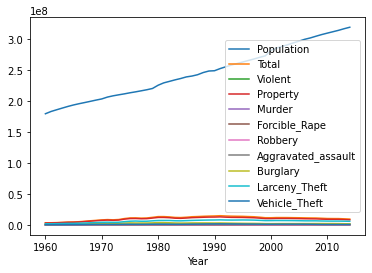

In [3]:

df = pd.read_csv("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/DS_Elsa/others/exercises/week_12_solutions/data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

### 1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.

In [40]:
df.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### 2. Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?

In [ ]:
*** Hay que tener en cuenta la columana Year porque nos da información a nuestra red ***

In [4]:
# Entrenar los datos hasta 2010
to_train = df.loc[: "2010",:]
# Predecir los datos con la columana "Muder", desde 2010
to_pred = df.loc["2010":,:]

In [5]:
print("to_train: " ,to_train.shape)
print("to_pred:  ", to_pred.shape)

to_train:  (51, 11)
to_pred:   (5, 11)


In [ ]:
##########

In [7]:
# Otra forma, de tomar dividir los valores de train y pred
to_train = df.loc[df.index[:-4]]
to_pred = df.loc[df.index[-4:]]

In [ ]:
###########

In [8]:
# Murder es la variable a predecir (target)
X = to_train.drop("Murder", axis=1)
y = to_train["Murder"]

In [9]:
# Dividir el conjunto
# Creamos el set de entrenamiento y test
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (40, 10) (40,)
Testing data shape :  (11, 10) (11,)


In [10]:

# define the keras model
original_model = models.Sequential()
original_model.add(layers.Dense(32, activation='relu',input_shape=[len(X.keys())]))
original_model.add(layers.Dense(32, activation='relu'))
original_model.add(layers.Dense(64, activation='linear'))
original_model.add(layers.Dense(1)) # la activación por defecto de la capa Dense es linear. En este caso sale sólo el valor

original_model.compile(loss='mse',
                    optimizer=tf.keras.optimizers.RMSprop(0.001),
                    metrics=['mae', 'mse'])

In [11]:

original_hist = original_model.fit(X, y,
                                   epochs=20,
                                   batch_size=40) # <--- fijarme en el número de datos, si pngo más datos que los que tengo da error.

Epoch 1/20
2/2 [==============================] - 0s 1ms/step - loss: 89206621732864.0000 - mae: 7516155.0000 - mse: 89206621732864.0000
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 10889601220608.0000 - mae: 3086020.5000 - mse: 10889601220608.0000
Epoch 3/20
2/2 [==============================] - 0s 1ms/step - loss: 84681170944.0000 - mae: 225442.5156 - mse: 84681170944.0000
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 54871924736.0000 - mae: 207062.9062 - mse: 54871924736.0000
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 54513086464.0000 - mae: 194038.7969 - mse: 54513086464.0000
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 97725587456.0000 - mae: 270199.9062 - mse: 97725587456.0000
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 91699412992.0000 - mae: 257155.6406 - mse: 91699412992.0000
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 481714

In [13]:
### Entrenamiento del modelo (epochs). Se registra la precisión del modelo en el objeto history
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print('ñ', end='')

In [20]:
EPOCHS = 20000
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Si lo quiero entrenar con todos los datos hasta el 2009
history = original_model.fit(X.values,y, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

ñññññññññññññ

In [17]:
original_hist.history.keys()

dict_keys(['loss', 'mae', 'mse'])

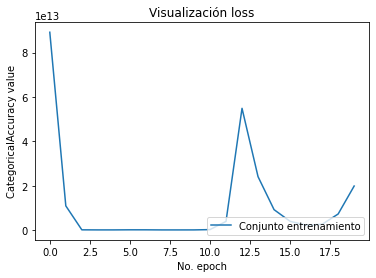

In [21]:
# Visualización del modelo:
plt.plot(original_hist.history['loss'], label='Conjunto entrenamiento')
#plt.plot(history.history['val_categorical_accuracy'], label='validation data)')
plt.title('Visualización loss')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

### 3.  Ahora, prueba 3 optimizadores diferentes, ¿se modifica el resultado? ¿cuál te ha dado mejores resultados? 

In [22]:
# otro optimizador

original_model1 = models.Sequential()
original_model1.add(layers.Dense(32, activation='relu',input_shape=[len(X.keys())]))
original_model1.add(layers.Dense(32, activation='relu'))
original_model1.add(layers.Dense(64, activation='linear'))
original_model1.add(layers.Dense(1))


original_model1.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mae', 'mse'])

original_hist1 = original_model.fit(X, y,
                                   epochs=20,
                                   batch_size=40)

Epoch 1/20
2/2 [==============================] - 0s 1ms/step - loss: 13475747201024.0000 - mae: 3550188.5000 - mse: 13475747201024.0000
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 33559054123008.0000 - mae: 5709317.0000 - mse: 33559054123008.0000
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 13374849024000.0000 - mae: 3571110.0000 - mse: 13374849024000.0000
Epoch 4/20
2/2 [==============================] - 0s 1ms/step - loss: 2338450833408.0000 - mae: 1495852.7500 - mse: 2338450833408.0000
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 683378540544.0000 - mae: 804329.9375 - mse: 683378540544.0000
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 995922083840.0000 - mae: 976399.4375 - mse: 995922214912.0000
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 1350832488448.0000 - mae: 1131929.0000 - mse: 1350832488448.0000
Epoch 8/20
2/2 [==============================] - 0s 2m

In [24]:
EPOCHS = 20000
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Si lo quiero entrenar con todos los datos hasta el 2009
history = original_model1.fit(X.values,y, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

ññññññññññññññññññññ

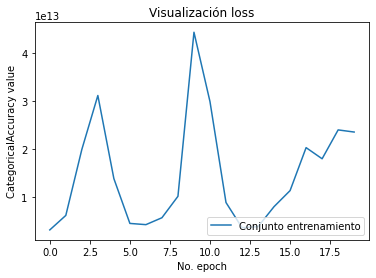

In [13]:
# Visualización del modelo:
plt.plot(original_hist1.history['loss'], label='Conjunto entrenamiento')
#plt.plot(history.history['val_categorical_accuracy'], label='validation data)')
plt.title('Visualización loss')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [ ]:
######################

In [25]:
# otro optimizador

original_model2 = models.Sequential()
original_model2.add(layers.Dense(32, activation='relu',input_shape=[len(X.keys())]))
original_model2.add(layers.Dense(32, activation='relu'))
original_model2.add(layers.Dense(64, activation='linear'))
original_model2.add(layers.Dense(1))


original_model2.compile(loss='mse',
                    optimizer='sgd',
                    metrics=['mae', 'mse'])

original_hist2 = original_model.fit(X, y,
                                   epochs=20,
                                   batch_size=40)

Epoch 1/20
2/2 [==============================] - 0s 1ms/step - loss: 2224002433024.0000 - mae: 1465052.2500 - mse: 2224002433024.0000
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 3625096839168.0000 - mae: 1868005.3750 - mse: 3625096839168.0000
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 8007582744576.0000 - mae: 2781694.0000 - mse: 8007582744576.0000
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 11507584729088.0000 - mae: 3346738.2500 - mse: 11507584729088.0000
Epoch 5/20
2/2 [==============================] - 0s 1ms/step - loss: 13775215263744.0000 - mae: 3651095.0000 - mse: 13775215263744.0000
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 3833457541120.0000 - mae: 1928088.5000 - mse: 3833457541120.0000
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 2119569113088.0000 - mae: 1432621.0000 - mse: 2119569113088.0000
Epoch 8/20
2/2 [==============================] - 0

In [26]:
EPOCHS = 20000
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Si lo quiero entrenar con todos los datos hasta el 2009
history = original_model2.fit(X.values,y, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

ññññññññññ

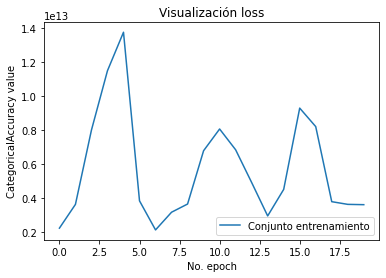

In [27]:
# Visualización del modelo:
plt.plot(original_hist2.history['loss'], label='Conjunto entrenamiento')
#plt.plot(history.history['val_categorical_accuracy'], label='validation data)')
plt.title('Visualización loss')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [ ]:
########################

In [28]:
# otro optimizador

original_model3 = models.Sequential()
original_model3.add(layers.Dense(32, activation='relu',input_shape=[len(X.keys())]))
original_model3.add(layers.Dense(32, activation='relu'))
original_model3.add(layers.Dense(64, activation='linear'))
original_model3.add(layers.Dense(1))


original_model3.compile(loss='mse',
                    optimizer='rmsprop',
                    metrics=['mae', 'mse'])

original_hist3 = original_model.fit(X, y,
                                   epochs=20,
                                   batch_size=40)

Epoch 1/20
2/2 [==============================] - 0s 1ms/step - loss: 4290198634496.0000 - mae: 2037682.3750 - mse: 4290198634496.0000
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 6198449930240.0000 - mae: 2450920.5000 - mse: 6198449930240.0000
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 6925046513664.0000 - mae: 2596573.5000 - mse: 6925046513664.0000
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 7773274767360.0000 - mae: 2746342.5000 - mse: 7773274767360.0000
Epoch 5/20
2/2 [==============================] - 0s 1ms/step - loss: 4782458667008.0000 - mae: 2157796.0000 - mse: 4782458667008.0000
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 3540793688064.0000 - mae: 1852704.3750 - mse: 3540793688064.0000
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 3494995296256.0000 - mae: 1837209.8750 - mse: 3494995296256.0000
Epoch 8/20
2/2 [==============================] - 0s 3m

In [29]:
EPOCHS = 20000
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Si lo quiero entrenar con todos los datos hasta el 2009
history = original_model3.fit(X.values,y, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

ñññññññññññññ

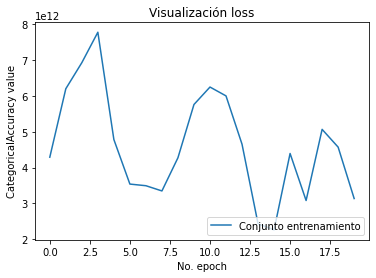

In [30]:
# Visualización del modelo:
plt.plot(original_hist3.history['loss'], label='Conjunto entrenamiento')
#plt.plot(history.history['val_categorical_accuracy'], label='validation data)')
plt.title('Visualización loss')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

### 4. Con el mejor optimizador modifica la función de activación a otra diferente. ¿Cuál ha dado mejor resultado?


In [37]:
# El mejor modelo es el original_model, coincide con el primero que he entrenado:
original_model = models.Sequential()
original_model.add(layers.Dense(32, activation='relu',input_shape=[len(X.keys())]))
original_model.add(layers.Dense(32, activation='sigmoid'))
original_model.add(layers.Dense(64, activation='linear'))
original_model.add(layers.Dense(1))

original_model.compile(loss='mse',
                    optimizer=tf.keras.optimizers.RMSprop(0.001),
                    metrics=['mae', 'mse'])


original_hist = original_model.fit(X, y,
                                   epochs=20,
                                   batch_size=40)

Epoch 1/20
2/2 [==============================] - 0s 1ms/step - loss: 326171360.0000 - mae: 17537.2031 - mse: 326171328.0000
Epoch 2/20
2/2 [==============================] - 0s 1ms/step - loss: 326131712.0000 - mae: 17536.0879 - mse: 326131712.0000
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 326103456.0000 - mae: 17535.2812 - mse: 326103456.0000
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 326079616.0000 - mae: 17534.5996 - mse: 326079616.0000
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 326058016.0000 - mae: 17533.9902 - mse: 326057984.0000
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 326037152.0000 - mae: 17533.3906 - mse: 326037152.0000
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 326017472.0000 - mae: 17532.8340 - mse: 326017472.0000
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 325998016.0000 - mae: 17532.2695 - mse: 325998016.0000


In [38]:
EPOCHS = 20000
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Si lo quiero entrenar con todos los datos hasta el 2009
history = original_model.fit(X.values,y, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

ññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññ

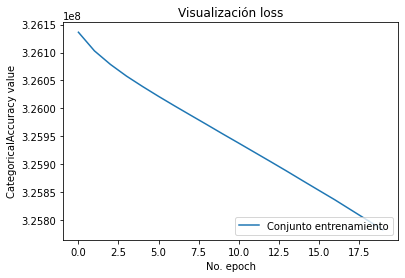

In [34]:
# Visualización del modelo:
plt.plot(original_hist.history['loss'], label='Conjunto entrenamiento')
#plt.plot(history.history['val_categorical_accuracy'], label='validation data)')
plt.title('Visualización loss')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [39]:
original_model = models.Sequential()
original_model.add(layers.Dense(32, activation='sigmoid',input_shape=[len(X.keys())]))
original_model.add(layers.Dense(32, activation='sigmoid'))
original_model.add(layers.Dense(64, activation='sigmoid'))
original_model.add(layers.Dense(1))

original_model.compile(loss='mse',
                    optimizer=tf.keras.optimizers.RMSprop(0.001),
                    metrics=['mae', 'mse'])


original_hist = original_model.fit(X, y,
                                   epochs=20,
                                   batch_size=40)

Epoch 1/20
2/2 [==============================] - 0s 1ms/step - loss: 326113920.0000 - mae: 17535.5820 - mse: 326113920.0000
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 326099456.0000 - mae: 17535.1699 - mse: 326099456.0000
Epoch 3/20
2/2 [==============================] - 0s 1ms/step - loss: 326089504.0000 - mae: 17534.8848 - mse: 326089472.0000
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 326081184.0000 - mae: 17534.6465 - mse: 326081184.0000
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 326073632.0000 - mae: 17534.4316 - mse: 326073632.0000
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 326066336.0000 - mae: 17534.2246 - mse: 326066336.0000
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 326059296.0000 - mae: 17534.0254 - mse: 326059296.0000
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 326052544.0000 - mae: 17533.8301 - mse: 326052544.0000


In [40]:
EPOCHS = 20000
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Si lo quiero entrenar con todos los datos hasta el 2009
history = original_model.fit(X.values,y, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

ññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññ

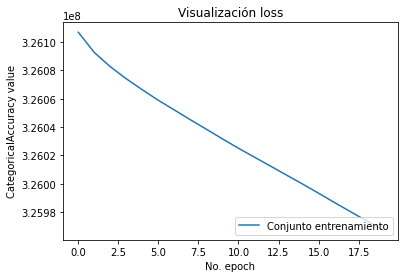

In [31]:
# Visualización del modelo:
plt.plot(original_hist.history['loss'], label='Conjunto entrenamiento')
#plt.plot(history.history['val_categorical_accuracy'], label='validation data)')
plt.title('Visualización loss')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [41]:
original_model = models.Sequential()
original_model.add(layers.Dense(32, activation='sigmoid',input_shape=[len(X.keys())]))
original_model.add(layers.Dense(32, activation='sigmoid'))
original_model.add(layers.Dense(64, activation='softmax')) # <-- implica softmax q salgan valores entre 0y1. Y le da menos importancia, aunque nos puede resultar muy útil. Importante ponerlo siempre en la última capa y para los algoritmos de clasificación. No utilizarlo nunca en regresión
original_model.add(layers.Dense(1)) #<-- Capa de salida

original_model.compile(loss='mse',
                    optimizer=tf.keras.optimizers.RMSprop(0.001),
                    metrics=['mae', 'mse'])


original_hist = original_model.fit(X, y,
                                   epochs=20,
                                   batch_size=40)

Epoch 1/20
2/2 [==============================] - 0s 1ms/step - loss: 326140896.0000 - mae: 17536.3516 - mse: 326140896.0000
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 326140032.0000 - mae: 17536.3262 - mse: 326140032.0000
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 326139456.0000 - mae: 17536.3105 - mse: 326139456.0000
Epoch 4/20
2/2 [==============================] - 0s 1ms/step - loss: 326138912.0000 - mae: 17536.2949 - mse: 326138912.0000
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 326138464.0000 - mae: 17536.2812 - mse: 326138464.0000
Epoch 6/20
2/2 [==============================] - 0s 1ms/step - loss: 326138048.0000 - mae: 17536.2695 - mse: 326138048.0000
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 326137632.0000 - mae: 17536.2578 - mse: 326137632.0000
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 326137312.0000 - mae: 17536.2480 - mse: 326137312.0000


In [42]:
EPOCHS = 20000
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#Si lo quiero entrenar con todos los datos hasta el 2009
history = original_model.fit(X.values,y, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

ññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññññ

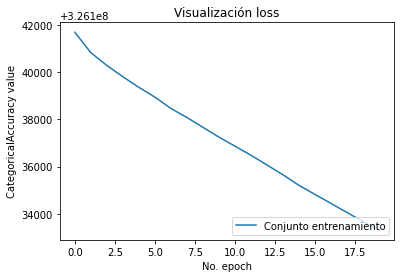

In [40]:
# Visualización del modelo:
plt.plot(original_hist.history['loss'], label='Conjunto entrenamiento')
#plt.plot(history.history['val_categorical_accuracy'], label='validation data)')
plt.title('Visualización loss')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

In [ ]:
He dejado representadas las que mejor resultado me han dado. Aunque si tengo que elegir me quedo con los dos primeros.

### 5. Ahora, haz que la red tenga 7 capas con 17,9,4,16,4,4,4 neuronas respectivamente. Utiliza la mejor función de activación y el mejor optimizador. ¿Esta red da mejor resultado? (Si da problema de memoria, prueba a quitar capas.)


In [42]:
original_model_7 = models.Sequential()
original_model_7.add(layers.Dense(17, activation='relu',input_shape=[len(X.keys())]))
original_model_7.add(layers.Dense(9, activation='sigmoid'))
original_model_7.add(layers.Dense(4, activation='sigmoid'))
original_model_7.add(layers.Dense(16, activation='softmax'))
original_model_7.add(layers.Dense(4, activation='softmax'))
original_model_7.add(layers.Dense(4, activation='sigmoid'))
original_model_7.add(layers.Dense(4, activation='linear'))
original_model_7.add(layers.Dense(1))

original_model_7.compile(loss='mse',
                    optimizer=tf.keras.optimizers.RMSprop(0.001),
                    metrics=['mae', 'mse'])


original_hist_7 = original_model_7.fit(X, y,
                                   epochs=20,
                                   batch_size=40)

Epoch 1/20
2/2 [==============================] - 0s 2ms/step - loss: 326181152.0000 - mae: 17537.5000 - mse: 326181152.0000
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 326179200.0000 - mae: 17537.4414 - mse: 326179168.0000
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 326177824.0000 - mae: 17537.4043 - mse: 326177824.0000
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 326176672.0000 - mae: 17537.3691 - mse: 326176672.0000
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 326175648.0000 - mae: 17537.3438 - mse: 326175648.0000
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 326174688.0000 - mae: 17537.3145 - mse: 326174688.0000
Epoch 7/20
2/2 [==============================] - 0s 1ms/step - loss: 326173824.0000 - mae: 17537.2910 - mse: 326173824.0000
Epoch 8/20
2/2 [==============================] - 0s 1ms/step - loss: 326172992.0000 - mae: 17537.2656 - mse: 326172992.0000


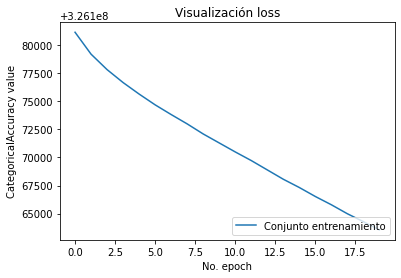

In [43]:
# Visualización del modelo:
plt.plot(original_hist_7.history['loss'], label='Conjunto entrenamiento')
#plt.plot(history.history['val_categorical_accuracy'], label='validation data)')
plt.title('Visualización loss')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

### 6. Por último, genera una red convolucional con 2 capas convolucionales sin MaxPool, ¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?


In [ ]:
**** Modificar lo de convulución ******

In [ ]:
layer = tf.keras.layers.Activation('relu')

In [47]:
 # crear modelo
original_model_8.add(layers.Dense(17, activation='relu',input_shape=[len(X.keys())]))
original_model_8.add(layers.Dense(9, activation='sigmoid'))
original_model_8.add(layers.Dense(1))
# resumen modelo
original_model_8.summary ()

original_model_8.compile(loss='mse',
                    optimizer=tf.keras.optimizers.RMSprop(0.001),
                    metrics=['mae', 'mse'])


original_hist_8 = original_model_7.fit(X, y,
                                   epochs=20,
                                   batch_size=40)

Model: &quot;sequential_19&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 17)                187       
_________________________________________________________________
dense_81 (Dense)             (None, 9)                 162       
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 10        
_________________________________________________________________
dense_83 (Dense)             (None, 17)                34        
_________________________________________________________________
dense_84 (Dense)             (None, 9)                 162       
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 10        
Total params: 565
Trainable params: 565
Non-trainable params: 0
_____________________________________________

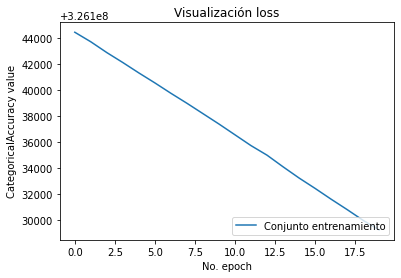

In [48]:
# Visualización del modelo:
plt.plot(original_hist_8.history['loss'], label='Conjunto entrenamiento')
#plt.plot(history.history['val_categorical_accuracy'], label='validation data)')
plt.title('Visualización loss')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.show()

### 7. ¿Qué crees que pasaría si entrenamos la red hasta el año 2000 y predecimos desde el 2000 hasta el 2014? (Bonus: realiza el mismo proceso de los ejercicios 2-6 pero entrenando solo hasta el año 2000)

In [51]:
to_pred

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
2010,309330219,10363873,1251248,9112625,14772,85593,369089,781844,2168457,6204601,739565
2011,311587816,10258774,1206031,9052743,14661,84175,354772,752423,2185140,6151095,716508
2012,313873685,10219059,1217067,9001992,14866,85141,355051,762009,2109932,6168874,723186
2013,316497531,9850445,1199684,8650761,14319,82109,345095,726575,1931835,6018632,700294
2014,318857056,9475816,1197987,8277829,14249,84041,325802,741291,1729806,5858496,689527


In [ ]:
 # aplicar filtro a datos de entrada
new_model = original_model.predict (to_pred)